# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
btc_holdings = 1.2
eth_holdings = 5.2

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=json"

In [23]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_price.content

# Fetch current ETH price
eth_price = requests.get(eth_url)
eth_price.content

# Convert data to Json to identify the needed data 
btc_data = btc_price.json()
eth_data = eth_price.json()
btc_data
eth_data

btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
fva_btc = btc_holdings * btc_price
fva_eth = eth_holdings * eth_price

# Print current crypto wallet balance
print(f"The current value of your {btc_holdings} BTC is ${fva_btc:0.2f}")
print(f"The current value of your {eth_holdings} ETH is ${fva_eth:0.2f}")

The current value of your 1.2 BTC is $40486.80
The current value of your 5.2 ETH is $11197.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [26]:
# Current amount of shares
agg_holdings = 200
spy_holdings = 50

In [27]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [28]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-02", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
current_prices = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
current_prices.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-02 00:00:00-04:00  115.23  115.37  115.17  115.37  4219494  431.67   

                                                              
                            high       low   close    volume  
time                                                          
2021-07-02 00:00:00-04:00  434.1  430.5218  433.75  46557070

In [29]:
# Pick AGG and SPY close prices
agg_close_price = current_prices["AGG"]["close"].item()
spy_close_price = current_prices["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.37
Current SPY closing price: $433.75


In [33]:
# Compute the current value of shares
my_agg_value = agg_holdings * agg_close_price
my_spy_value = spy_holdings * spy_close_price
# Print current value of share
print(f"The current value of your {spy_holdings} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {agg_holdings} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21687.50
The current value of your 200 AGG shares is $23074.00


### Savings Health Analysis

In [37]:
# Set monthly household income
monthly_income = 20000

# Create savings DataFrame
total_portfolio = {'Amount': [fva_btc+fva_eth, my_spy_value+my_agg_value]}
fva_savings = pd.DataFrame(total_portfolio,index=['Crypto','Equities'])

# Display savings DataFrame
display(fva_savings)

,Amount
Crypto,51683.856
Equities,44761.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

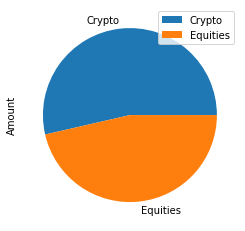

In [43]:
# Plot savings pie chart
fva_savings.plot(kind='pie', subplots=True)
# would like to add the value or percentage on the pie 

In [45]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = fva_savings.sum().item()
total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [46]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-02', tz='America/New_York').isoformat()

In [47]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438  392.12   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374  391.24   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765  389.85   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350  393.96   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386  390.42   

                                                             
                             high     low   close    volume  
time                                                         
2021-02-10 00:00:00-05:00  392.28  387.50  390.10  53797977  
2021-02-11 00:00:00-05:00  391.69  388.10  390.73  38939025  
2021-02-12 00:00:00-05:00  392.90  389.77  392.69  39697380  
2021-02-16 00:00:00-05:00  394.17  391.53  392.34  43206214  
2021-02-17 00:00:00-05:00  392.66  389.33  392.43  44671866

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mcs_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [52]:
# Printing the simulation input data
mcs_30_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-02-10 00:00:00-05:00          NaN  392.12  392.28  387.50  390.10   
2021-02-11 00:00:00-05:00    -0.001111  391.24  391.69  388.10  390.73   
2021-02-12 00:00:00-05:00    -0.002481  389.85  392.90  389.77  392.69   
2021-02-16 00:00:00-05:00    -0.004718  393.96  394.17  391.53  392.34   
2021-02-17 00:00:00-05:00     0.002155  390.42  392.66  389.33  392.43   

                                                  
                             volume daily_return  
time                                              
2021-02-10 00:00:00-05:00  53797977          NaN  
2021-02-11 00:00:00-05:00  38939025     0.001615  
2021-02-12 00:00:00-05:00  39697380     0.005016  
2021-02-16 00:00:00-05:00  43206214    -0.000891  
2021-02-17 00:00:00-05:00  44671866     0.000229

In [54]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mcs_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995645,1.000175,0.994559,0.994389,1.000110,1.001886,0.999796,0.997042,0.997431,1.001031,...,1.004579,0.997270,1.001542,0.996278,0.996282,1.001383,1.000716,1.004061,0.998061,0.999287
2,0.996354,0.999227,0.994394,0.997933,0.998734,1.006821,1.006890,0.998494,1.001852,0.997663,...,1.008774,1.002747,1.005535,0.999936,0.995743,0.997932,0.999896,1.008574,0.999422,1.000969
3,0.994973,1.003846,0.996263,0.991397,0.996297,1.003204,1.004457,0.996876,1.000194,0.999640,...,1.005509,1.003964,1.002770,0.992546,1.000805,0.997222,1.003140,1.009597,1.003660,1.004176
4,0.995157,1.003306,0.998348,0.990079,0.998392,1.003212,1.002250,0.996261,0.999619,0.999979,...,1.007534,1.012126,1.001951,0.991495,1.003034,0.999794,1.003784,1.012260,1.006651,1.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.236684,4.650837,3.230399,3.239146,4.189029,3.067690,3.129040,2.507821,3.682384,3.628134,...,3.522460,3.948406,4.380986,2.824814,3.335956,2.978517,2.947954,2.912237,2.978534,2.361096
7557,4.247108,4.650108,3.232184,3.227986,4.190436,3.073637,3.131810,2.515338,3.669003,3.627327,...,3.520699,3.961449,4.379248,2.816593,3.332201,2.985964,2.969969,2.908989,2.980561,2.359642
7558,4.239245,4.657511,3.213321,3.240015,4.178490,3.077424,3.141615,2.512351,3.669949,3.626963,...,3.511061,3.978937,4.404514,2.799861,3.326309,2.984577,2.964866,2.909008,2.961482,2.344174
7559,4.255773,4.667047,3.226158,3.248736,4.162210,3.056396,3.135896,2.524358,3.664082,3.628784,...,3.531717,3.965277,4.395495,2.792863,3.342575,2.988710,2.963812,2.901543,2.963964,2.341166


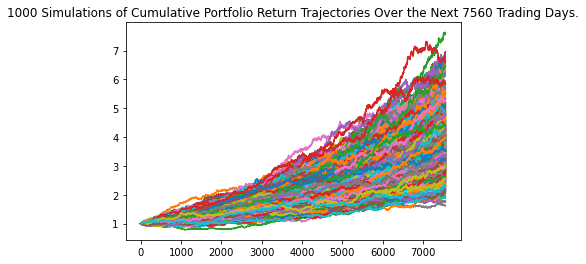

In [58]:
# Plot simulation outcomes
cumu_returns_plot = mcs_30_year.plot_simulation()

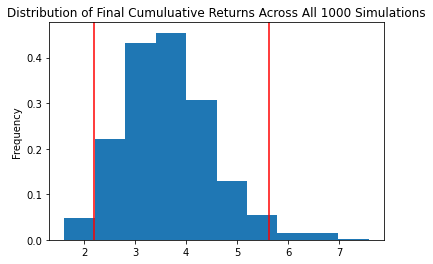

In [57]:
# Plot probability distribution and confidence intervals
dist_confi = mcs_30_year.plot_distribution()


### Retirement Analysis

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
table = mcs_30_year.summarize_cumulative_return()

# Print summary statistics
print(table)

count           1000.000000
mean               3.646184
std                0.880336
min                1.612032
25%                3.038583
50%                3.560651
75%                4.173473
max                7.573458
95% CI Lower       2.198180
95% CI Upper       5.620593
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [61]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43963.61 and $112411.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [62]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65945.41 and $168617.78


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [65]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998327,1.002779,1.004644,0.997688,0.999495,1.001779,0.996405,1.002693,1.006415,1.001911,...,1.000401,1.000225,0.998812,1.007568,1.002790,1.000602,1.003943,0.999099,0.998883,0.997128
2,0.999586,1.002899,1.000755,0.998083,1.000107,1.004520,0.993034,1.002552,1.009732,1.007409,...,0.995664,1.003121,0.996577,1.005399,1.004855,1.001641,1.003960,1.001107,0.994357,0.993872
3,0.999152,1.007315,0.998764,0.996419,0.998434,1.002202,0.991469,1.006447,1.009675,1.014928,...,0.993608,1.003903,0.994063,1.007492,1.012755,0.998574,1.005304,0.999926,0.995362,0.994908
4,0.997538,1.008062,1.002378,0.997555,1.000000,1.004021,0.988542,1.009533,1.006179,1.017097,...,0.995425,1.006886,0.993057,1.006670,1.016532,0.998722,1.006239,0.993159,0.996547,0.996246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.170145,1.059181,1.072978,1.185150,1.366980,1.063953,1.202947,1.454723,1.096669,1.159858,...,1.201887,1.298228,1.105008,1.050705,1.186489,1.154080,1.219679,1.171534,1.195622,1.172054
1257,1.170240,1.057353,1.079242,1.184839,1.376461,1.059964,1.204471,1.455122,1.098161,1.159053,...,1.202136,1.295405,1.103775,1.048612,1.187929,1.145015,1.219897,1.176461,1.188617,1.164981
1258,1.167653,1.056325,1.081265,1.189452,1.374736,1.064171,1.208485,1.454785,1.101641,1.152613,...,1.195271,1.293872,1.096619,1.046125,1.186242,1.143182,1.223654,1.175329,1.192170,1.166928
1259,1.169634,1.054714,1.082778,1.191655,1.371608,1.061588,1.207170,1.457937,1.105462,1.150534,...,1.196351,1.292083,1.096121,1.047656,1.183138,1.143743,1.218438,1.177762,1.193761,1.165436


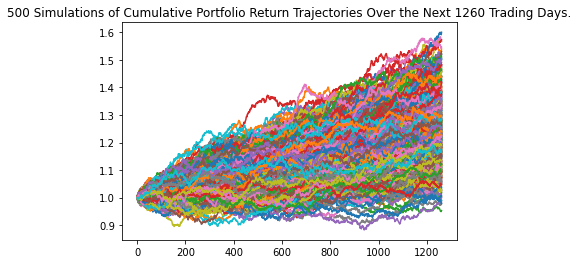

In [79]:
# Plot simulation outcomes
cumu_returns_five = mcs_5_year.plot_simulation()

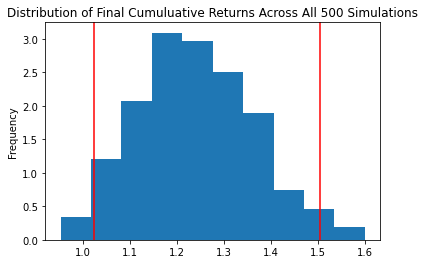

In [67]:
# Plot probability distribution and confidence intervals
five_dist_confi = mcs_5_year.plot_distribution()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
table = mcs_5_year.summarize_cumulative_return()


# Print summary statistics
print(table)

count           500.000000
mean              1.239266
std               0.123593
min               0.952984
25%               1.151070
50%               1.230537
75%               1.326823
max               1.599586
95% CI Lower      1.024268
95% CI Upper      1.503706
Name: 1260, dtype: float64


In [71]:
# Set initial investment
initial_investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(table[8]*initial_investment,2)
ci_upper_five = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $30728.04 and $45111.19


### Ten Years Retirement Option

In [77]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [75]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002202,0.999897,1.002402,1.002649,0.998586,0.999729,1.001857,1.001046,1.002023,1.004661,...,0.999160,0.995916,1.000650,0.998232,1.001508,1.003003,0.998250,0.999890,0.999551,0.999515
2,1.004170,0.997149,1.006034,0.998846,0.995182,0.997632,0.999444,0.998001,1.001809,1.004916,...,0.995654,1.002437,1.000961,1.000271,0.995639,1.004119,0.996682,1.003474,1.000430,0.998939
3,1.005816,0.997209,1.009158,0.997686,0.994938,0.997198,0.996814,0.997463,0.998903,1.001843,...,0.996126,1.000549,1.006481,0.999565,0.997960,1.001902,0.994866,1.007244,0.999868,0.995868
4,1.009110,0.997480,1.010090,0.997438,0.991539,1.001523,0.998589,0.996293,1.003089,1.007017,...,0.997111,1.004337,1.011262,0.999003,0.991541,1.003790,0.992561,1.006832,1.004014,0.996414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.594653,1.624959,1.570062,1.510023,1.899499,2.075032,1.502703,1.680272,1.618837,1.510244,...,1.936444,1.540582,1.357026,1.684953,1.578520,1.642213,1.493649,1.545371,1.634116,1.780181
2517,1.592803,1.621980,1.578003,1.510742,1.895064,2.081982,1.506906,1.682922,1.618952,1.504795,...,1.947852,1.540588,1.355126,1.686670,1.581328,1.641580,1.493509,1.540348,1.633573,1.775874
2518,1.596510,1.621248,1.579061,1.509085,1.892745,2.071197,1.502816,1.684816,1.623653,1.510026,...,1.955207,1.536158,1.355515,1.687474,1.583066,1.642704,1.492906,1.544109,1.636171,1.777778
2519,1.599701,1.627166,1.577090,1.511300,1.890285,2.080195,1.497925,1.686511,1.625607,1.505866,...,1.952057,1.538937,1.353204,1.687559,1.584463,1.647173,1.491899,1.547283,1.633114,1.777477


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

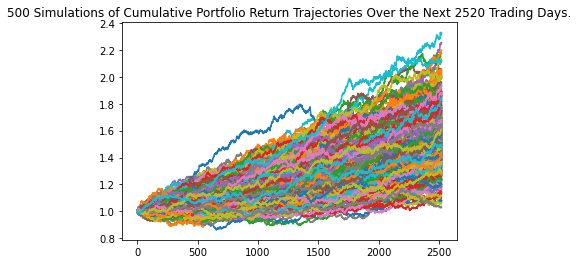

In [78]:
# Plot simulation outcomes
cumu_returns_ten = mcs_ten_year.plot_simulation()

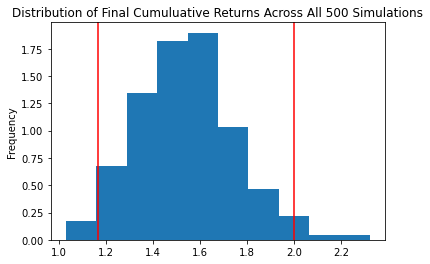

In [80]:
# Plot probability distribution and confidence intervals
ten_dist_confi = mcs_ten_year.plot_distribution()

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = mcs_ten_year.summarize_cumulative_return()
# Print summary statistics 
print(tbl)

count           500.000000
mean              1.540326
std               0.209792
min               1.028221
25%               1.396574
50%               1.536657
75%               1.665565
max               2.325038
95% CI Lower      1.164566
95% CI Upper      1.998924
Name: 2520, dtype: float64


In [90]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(table[8]*initial_investment,2)
ci_upper_ten = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61456.07 and $90222.39
